In [1]:
#!/usr/bin/env python
import fiona
import fiona.crs
import shapely
from shapely.geometry import Polygon, shape, box, mapping
import math

import geopandas as gpd
import matplotlib.pyplot as plt

#def main():
tile_size = 800000

# Load canada.geojson file with fiona
source = fiona.open('../tiler/canada2.geojson')
canada = shape(source[0]["geometry"])
#print(canada)

In [2]:
tile = box(tile_size,2*tile_size,0,tile_size)
print(tile)

POLYGON ((0 1600000, 0 800000, 800000 800000, 800000 1600000, 0 1600000))


In [3]:
container = []
range_minx = math.floor(source.bounds[0]/tile_size)
range_maxx = math.ceil(source.bounds[2]/tile_size)
range_miny = math.floor(source.bounds[1]/tile_size)
range_maxy = math.ceil(source.bounds[3]/tile_size)
for i in range(range_minx,range_maxx):
    x = i * tile_size
    for j in range(range_miny,range_maxy):
        y = j * tile_size
        my_tile = box(x,y,x+tile_size,y+tile_size)
        if my_tile.intersects(canada):
            container.append(my_tile)
#print(container)
# add visualization 

In [4]:
# write a new geojson 
schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
}

In [5]:
with fiona.open ('tilecanada.geojson','w','GeoJSON',schema, crs=fiona.crs.from_epsg(3979)) as output:
    for i in container:
        index = 0
        output.write({
            'geometry': mapping(i),
            'properties': {'id': index+1}})
output.close()

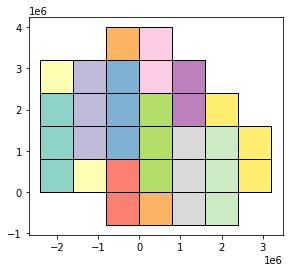

In [6]:
tile_geom = [shape(i) for i in container]
#print(tile_geom)
tile_gdf = gpd.GeoDataFrame({'geometry':tile_geom})
#print(tile_gdf)

ax = tile_gdf.plot(cmap='Set3')
#coverage_gdf.plot(ax=ax, facecolor='none', edgecolor='k');
tile_gdf.plot(ax=ax, facecolor='none', edgecolor='k');

